In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Dataset
data = pd.read_csv("C:\\Users\\Mebal Chaudhary\\Downloads\\Admission_Predict.csv")
data.shape

(400, 9)

In [49]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

So, none of the data fields is empty, which means we do not have to deal with missing values.

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [5]:
data.drop('Serial No.', axis=1, inplace=True)

Removed the column for serial no.

In [6]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [7]:
#Let's see top 10 observation row and column wise
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [8]:
# Let's see the detail information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


Basically, we get an idea about all the data types and how many data points we have, here 400.

In [9]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [51]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


There is a 0.802 correlation between the GRE score and the chance of admission. So there might be a big chance that these variables (data) are highly related. In fact, the correlation is the second-highest, after the CGPA. So, we can determine that CGPA and GRE scores are most important in determining the chances of admission.

Text(0.5, 1.0, 'Correlation Factors Heat Map')

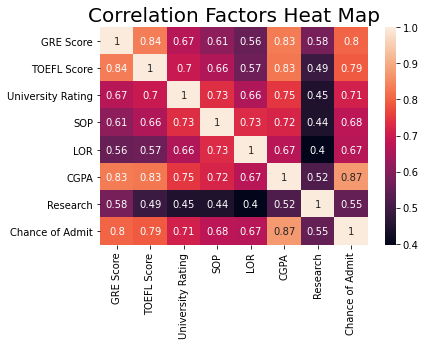

In [10]:
## Correlation coeffecients heatmap
sns.heatmap(data.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [11]:
# Isolating GRE Score data
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,400.000000
mean,316.807500
std,11.473646
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


The sample's GRE score mean is 316.

C:\Users\Mebal Chaudhary\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


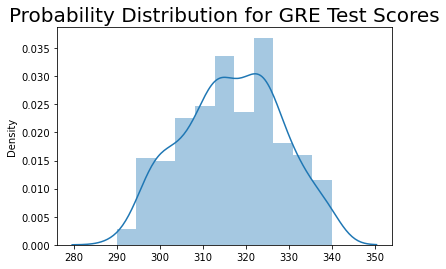

In [50]:
# # Probability Distribution
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')
plt.show()

As the distribution plot shows, the GRE test scores are somehow normally distributed.

In [13]:
# Correlation Coeffecients for GRE Score Test
GRE_CORR = pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score', axis=0, inplace=True)
GRE_CORR.rename({'GRE Score': 'GRE Correlation Coeff'}, axis=1, inplace=True)
GRE_CORR

,GRE Correlation Coeff
TOEFL Score,0.835977
University Rating,0.668976
SOP,0.612831
LOR,0.557555
CGPA,0.833060
Research,0.580391
Chance of Admit,0.802610


In [14]:
# Isolating and describing TOEFL Score
TOEFL = pd.DataFrame(data['TOEFL Score'], columns=['TOEFL Score'])
TOEFL.describe()

,TOEFL Score
count,400.000000
mean,107.410000
std,6.069514
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


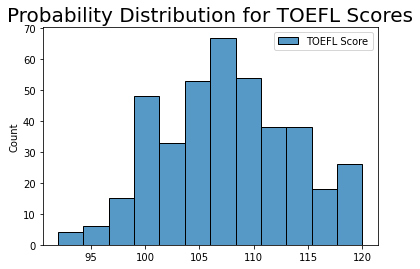

In [33]:
# Probability distribution for TOEFL Scores
sns.histplot(TOEFL).set_title('Probability Distribution for TOEFL Scores', size='20')
plt.show()

In [16]:
# Isolating and describing the CGPA
CGPA = pd.DataFrame(data['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,400.000000
mean,8.598925
std,0.596317
min,6.800000
25%,8.170000
50%,8.610000
75%,9.062500
max,9.920000


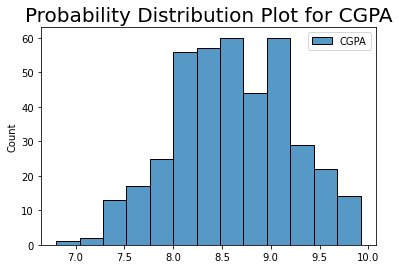

In [32]:
sns.histplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='20')
plt.show()

Text(0, 0.5, 'GRE Score')

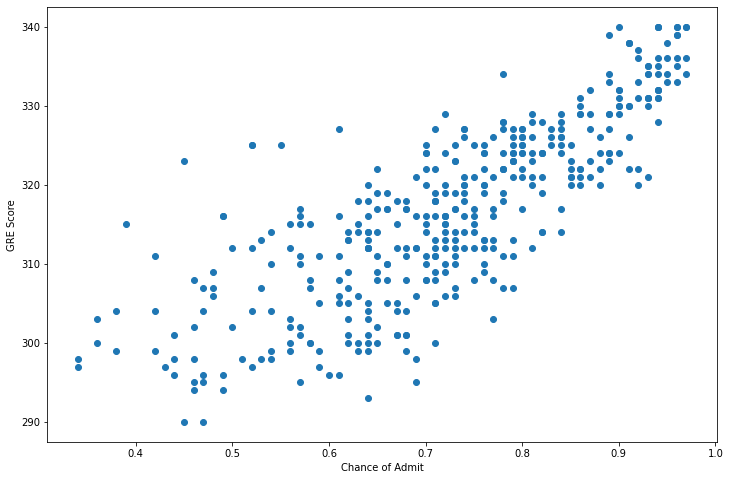

In [52]:
plt.subplots(figsize=(12,8))
plt.scatter(data['Chance of Admit'],data['GRE Score'])
plt.xlabel("Chance of Admit")
plt.ylabel("GRE Score")

There does appear to be a connection between the two variables. Some exploration needs to be done.

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

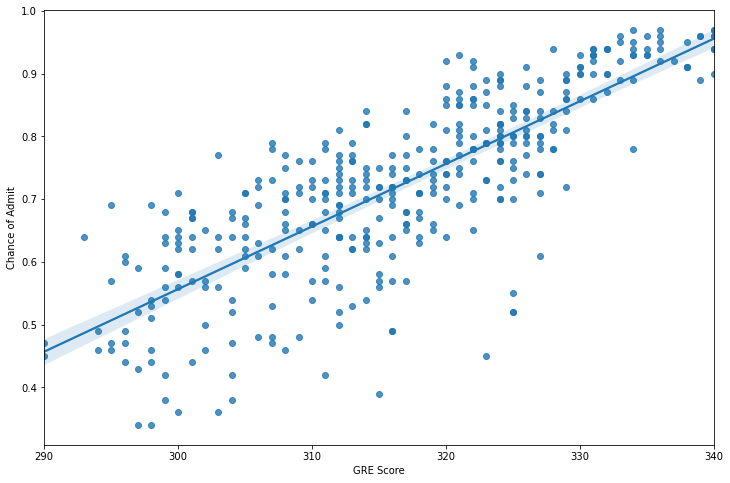

In [53]:
plt.subplots(figsize=(12,8))
sns.regplot(x='GRE Score', y='Chance of Admit', data=data)

We are able to comfortably plot a linear regression line through the data. Let us try some other plots and take in other data, to understand the whole picture as a whole.

[]

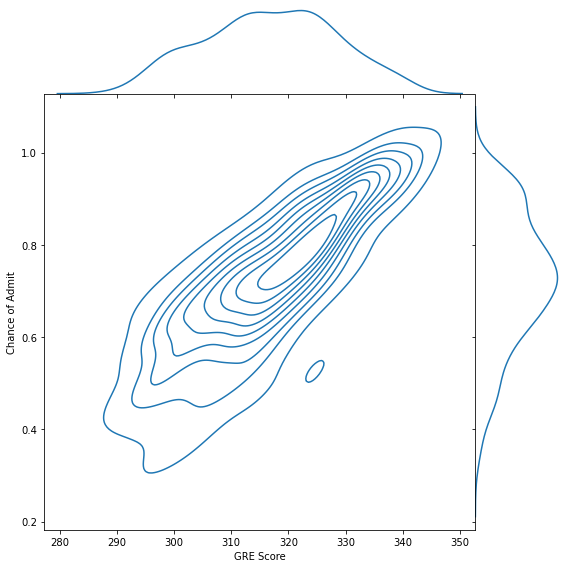

In [54]:
sns.jointplot(x=data['GRE Score'], y=data['Chance of Admit'], kind='kde', height=8, space=0)
plt.plot(figsize=(12,8))

Let us see if the research experience of a candidate helps in getting admits.

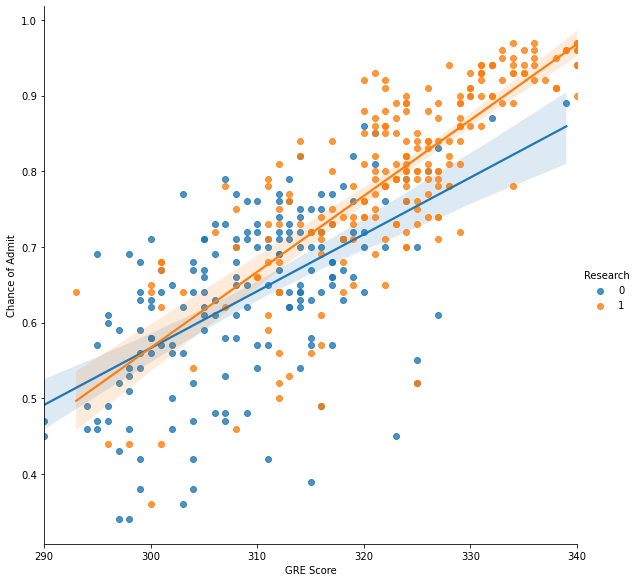

In [60]:
sns.lmplot(x='GRE Score', y='Chance of Admit', data=data, hue='Research',height= 8)


The data does show that candidates having research experience (orange in the figure), usually have more chance of admits. That being said, these candidates also have good GRE scores. So good GRE scores do indicate a good candidate profile.

Conclusion: Having research experience is very important.

Now, let us have a look at university ratings.

In [19]:
# Isolating and describing 
University_Rating = data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,26
2,107
3,133
4,74
5,60


How good the university is a value between 1 and 5 in integer increment , and since it has positive correlation factors with other variables it's clear that 5 is the highest rating and 1 is the lowest.

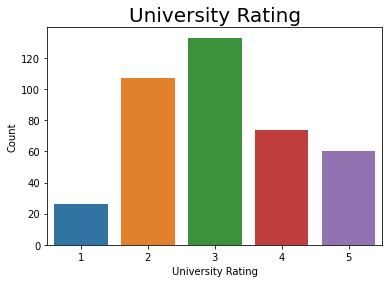

In [26]:
# Barplot for the distribution of the University Rating
sns.barplot(x=University_Rating.index, y=University_Rating['Count']).set_title('University Rating', size='20')
plt.show()

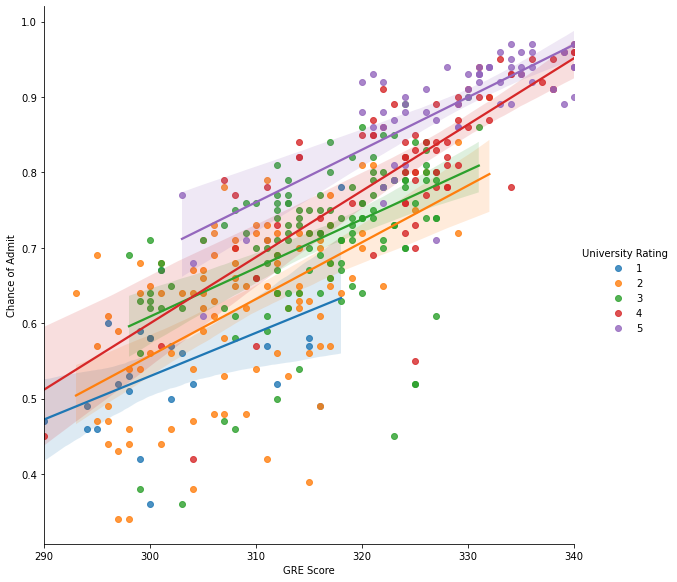

In [56]:
sns.lmplot(x='GRE Score', y='Chance of Admit', data=data, hue='University Rating',height=8)

Observations :

Students having higher GRE scores (>320) usually have a high chance of admission into the university with higher ratings (4/5).
A lower GRE score has a lower chance of admission, that too for universities of low ratings.
Students having a higher chance of admission, all have good GRE scores and University ratings of 4 or 5.